<a href="https://colab.research.google.com/github/premkumar0/MNIST-digits/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - CNN

# Loading data

In [ ]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

Libraries imported


In [ ]:
(X_train, Y_train), (X_test, Y_test) = helpers.dataset.load_data()

In [ ]:
X_train, X_test = np.expand_dims(X_train,3), np.expand_dims(X_test,3)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (60000, 28, 28, 1)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of Y_test: (10000,)


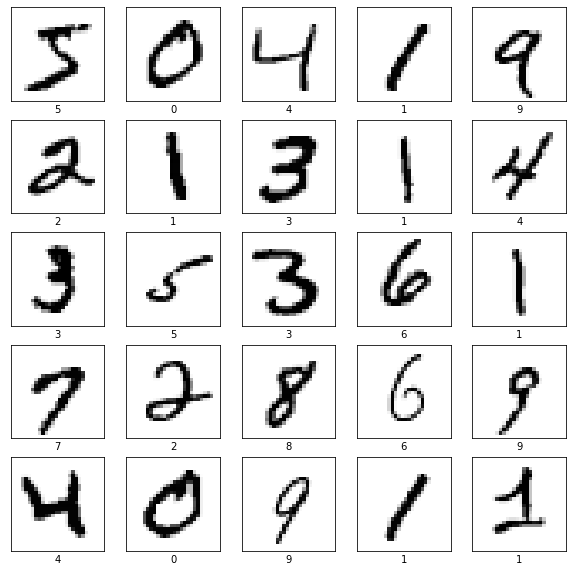

In [ ]:
helpers.plt.plot_train_digits(X_train,Y_train) #first 25 digits

## Implementation using tensorflow

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

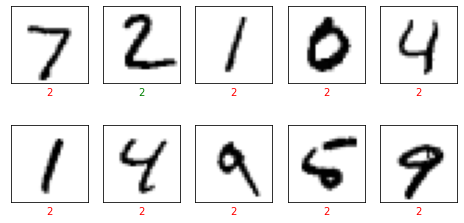

In [ ]:
#before training

preds= model.predict_classes(X_test[:20])
helpers.plt.show_ten_examples(X_test[:20], Y_test[:20], preds)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 1.0411 - accuracy: 0.8602 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.0666 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0543 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0432 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0752 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0454 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0597 -

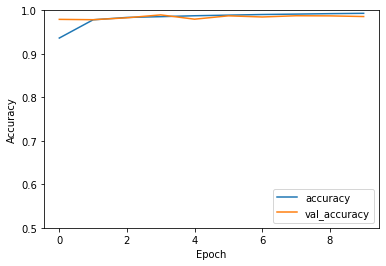

In [ ]:
helpers.plt.plot_accuracies(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 3s - loss: 0.0590 - accuracy: 0.9858


In [ ]:
print(test_acc)

0.98580002784729


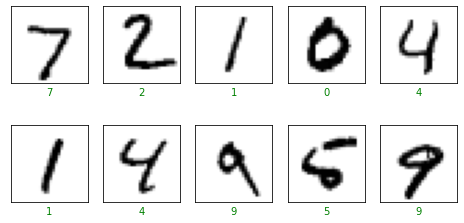

In [ ]:
#after training

preds= model.predict_classes(X_test[:20])
helpers.plt.show_ten_examples(X_test[:20], Y_test[:20], preds)